<a href="https://colab.research.google.com/github/Brandon780/DAY05/blob/master/segmentacion_clientes_kmeans_chatgpt_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


*Generar datos de clientes ficticios*

In [2]:
n_clientes = 1000
edad = np.random.randint(18, 65, size=n_clientes)
ingresos = np.random.normal(50000, 15000, size=n_clientes)
gasto_mensual = np.random.normal(5000, 2000, size=n_clientes)

*Generar datos de productos financieros*

In [3]:
tarjeta_credito = np.random.choice([0, 1], size=n_clientes, p=[0.8, 0.2])
prestamo_personal = np.random.choice([0, 1], size=n_clientes, p=[0.9, 0.1])
cuenta_ahorros = np.random.choice([0, 1], size=n_clientes, p=[0.7, 0.3])

data = pd.DataFrame({
    'edad': edad,
    'ingresos': ingresos,
    'gasto_mensual': gasto_mensual,
    'tarjeta_credito': tarjeta_credito,
    'prestamo_personal': prestamo_personal,
    'cuenta_ahorros': cuenta_ahorros
})

In [4]:
data

,edad,ingresos,gasto_mensual,tarjeta_credito,prestamo_personal,cuenta_ahorros
0,46,26378.000653,4145.961344,0,0,1
1,58,41165.519556,7897.845904,0,0,0
2,44,72658.259197,4768.379363,0,0,0
3,26,62533.958956,3504.997745,0,0,1
4,19,40843.719487,8204.389753,0,0,1
...,...,...,...,...,...,...
995,56,65519.903268,4552.252824,0,0,1
996,40,66074.581098,3111.317586,1,0,1
997,26,60168.600954,6981.116013,1,1,1
998,48,49292.697118,5040.281714,0,0,0


*preprocesamiento de datos escalar caracteristicas*

In [5]:
features = ['edad', 'ingresos', 'gasto_mensual']
data[features] = (data[features] - data[features].mean()) / data[features].std()


**Crear el modelo de K-means con 5 clusters**

In [6]:
kmeans = KMeans(n_clusters=5)

*Entrenar el modelo con los datos*

In [8]:
kmeans.fit(data[features])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

* Obtener las etiquetas de los clusters asignados a cada cliente*

In [9]:
labels = kmeans.labels_

*Añadir las etiquetas de los clusters al dataframe de datos*


In [10]:

data['cluster'] = labels

Visualización de los clusters en un diagrama de dispersión 2D

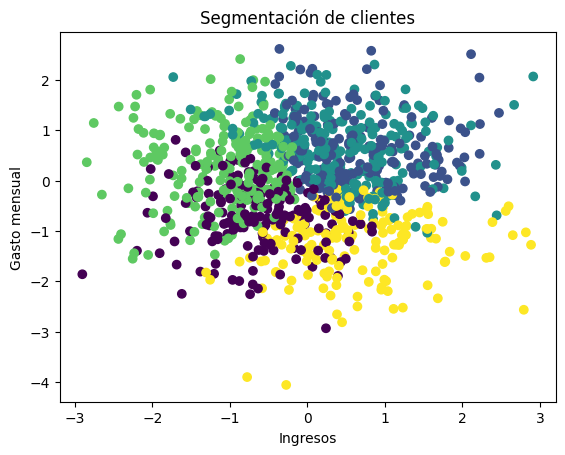

In [11]:
plt.scatter(data['ingresos'], data['gasto_mensual'], c=data['cluster'])
plt.xlabel('Ingresos')
plt.ylabel('Gasto mensual')
plt.title('Segmentación de clientes')
plt.show()